In [67]:
import pandas as pd
import numpy as np

df_A = pd.read_pickle('../data/interim/abbusive.pkl')
df_NA = pd.read_pickle('../data/interim/aggregated.pkl')

In [68]:
import re

def remove_handles(text):
    return re.sub('@[^\s]+','',text)

def remove_hashtags(text):
    return re.sub('#[^\s]+',string=text,repl='')

def remove_RT(text):
    return re.sub('^RT ',string=text,repl='')

def remove_url(text):
    return re.sub('http[^\s]+',string=text,repl='')

def process_text(text):
    return (remove_url(remove_RT(remove_hashtags(remove_handles(text))))).strip()

df_NA['Clean Contents'] = df_NA['Contents'].map(process_text)

#sum(df_Total.Stripped.duplicated())


In [69]:
del df_A['abusive']
del df_A['Tweeted At']
del df_A['Hashtags']

In [71]:
list(df_A.columns.values)

df_NA.columns = ['guid',
 'date',
 'url',
 'content',
 'authorName',
 'Name',
 'country',
 'state',
 'cityArea',
 'Category',
 'emotion',
 'source',
 'kloutScore',
 'gender',
 'posts',
 'followers',
 'following',
 'Clean Contents',]

In [72]:
df_A['Class']='Abusive'
df_NA['Class']='Not Abusive'
df_Total=pd.concat([df_A, df_NA])

In [73]:
df_Total=df_Total.drop_duplicates(subset=["Clean Contents"], keep='first')



In [104]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36085 entries, 52 to 2267606
Data columns (total 19 columns):
guid              36085 non-null int64
date              36085 non-null datetime64[ns]
url               36085 non-null object
content           36085 non-null object
authorName        36085 non-null object
Name              36084 non-null object
country           23309 non-null object
state             13817 non-null object
cityArea          11792 non-null object
Category          0 non-null float64
emotion           0 non-null float64
source            36085 non-null object
kloutScore        34529 non-null float64
gender            20888 non-null object
posts             36085 non-null float64
followers         36085 non-null float64
following         36085 non-null float64
Clean Contents    36085 non-null object
Class             36085 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(11)
memory usage: 5.5+ MB


In [76]:
sum(df_Total['Class']=='Not Abusive')


720107

# Plots 

In [77]:
df_60k=df_Total[(df_Total['Class']=='Not Abusive')]
df_60k=df_60k.sample(n=60000)
df_Abusive=df_Total[(df_Total['Class']=='Abusive')]


df_Totalnew=pd.concat([df_Abusive, df_60k])

In [78]:
df_Totalnew

,guid,date,url,content,authorName,Name,country,state,cityArea,Category,emotion,source,kloutScore,gender,posts,followers,following,Clean Contents,Class
52,872965256318005248,2017-06-08 23:55:00,http://twitter.com/wroberts291/status/87296525...,RT @Jab_bd @TurfmoorJo @LabourMuslims @RupaHuq...,@wroberts291,blueboy,NaN,NaN,NaN,NaN,NaN,Twitter,41.0,NaN,4935.0,534.0,533.0,who gives a fuck about football? Muslims are d...,Abusive
59,872965423540654080,2017-06-08 23:55:00,http://twitter.com/Edwina1002/status/872965423...,@EmilyThornberry Don't count your chickens jus...,@Edwina1002,edwina rigby,NaN,NaN,NaN,NaN,NaN,Twitter,18.0,F,343.0,1.0,21.0,"Don't count your chickens just yet big mouth, ...",Abusive
110,872964181170978819,2017-06-08 23:50:00,http://twitter.com/LukeTacey/status/8729641811...,@EmilyThornberry You are awful and the thought...,@LukeTacey,Luke,United Kingdom,West Midlands,Coventry,NaN,NaN,Twitter,18.0,M,408.0,42.0,195.0,You are awful and the thought of listening to ...,Abusive
143,872963194716815361,2017-06-08 23:46:00,http://twitter.com/poeliticaljazz/status/87296...,RT @SophiaTassew We ?? you @HackneyAbbott #Abb...,@poeliticaljazz,The Greater Fool,United Kingdom,NaN,NaN,NaN,NaN,Twitter,49.0,NaN,55377.0,1013.0,895.0,We ?? you #AbbotAppreciation,Abusive
236,872960775966662656,2017-06-08 23:37:00,http://twitter.com/BatesMoira/status/872960775...,@joncstone @LamiatSabin @EmilyThornberry Dimbl...,@BatesMoira,Moira B,United Kingdom,Yorkshire and the Humber,NaN,NaN,NaN,Twitter,47.0,F,10266.0,176.0,105.0,Dimbleby is an absolute dick. Look at his disg...,Abusive
348,872957968144371712,2017-06-08 23:26:00,http://twitter.com/TiltMyHat/status/8729579681...,@EmilyThornberry Apparently you're crap. Not i...,@TiltMyHat,Proud EU citizen,United Kingdom,East Midlands,NaN,NaN,NaN,Twitter,59.0,NaN,25909.0,907.0,1539.0,Apparently you're crap. Not in my view.,Abusive
369,872957467168309252,2017-06-08 23:24:00,http://twitter.com/DanielCookney/status/872957...,"I fucking love @EmilyThornberry, me.",@DanielCookney,??,United Kingdom,North West,Manchester,NaN,NaN,Twitter,52.0,NaN,5945.0,553.0,480.0,I fucking love me.,Abusive
389,872957283596107776,2017-06-08 23:23:00,http://twitter.com/____A______a__/status/87295...,"RT @joannelmw Goodness, @EmilyThornberry is as...",@____A______a__,[] [O][OO O][O]== [],United States of America,NaN,NaN,NaN,NaN,Twitter,NaN,NaN,3787.0,54.0,5001.0,"Goodness, is as charming as fuck *swoons* Pro...",Abusive
404,872956985628655618,2017-06-08 23:22:00,http://twitter.com/lordRsBiscuits/status/87295...,Even if bastard #UKIP or raving loonies get in...,@lordRsBiscuits,Lord Arse Biscuits,NaN,NaN,NaN,NaN,NaN,Twitter,50.0,NaN,38039.0,827.0,649.0,Even if bastard #UKIP or raving loonies get in...,Abusive
436,872956476259803136,2017-06-08 23:20:00,http://twitter.com/YaqMoody/status/87295647625...,@BBCPeterHunt @BBCNews @EmilyThornberry she's ...,@YaqMoody,Yaqub,NaN,NaN,NaN,NaN,NaN,Twitter,33.0,NaN,94.0,8.0,50.0,"she's an idiot for saying that, she should hav...",Abusive


In [81]:
df_Totalnew['Followers:Following']=df_Totalnew['followers']/df_Totalnew['following']
df_Totalnew.dropna(subset=['Followers:Following'], axis=0)

,guid,date,url,content,authorName,Name,country,state,cityArea,Category,emotion,source,kloutScore,gender,posts,followers,following,Clean Contents,Class,Followers:Following
52,872965256318005248,2017-06-08 23:55:00,http://twitter.com/wroberts291/status/87296525...,RT @Jab_bd @TurfmoorJo @LabourMuslims @RupaHuq...,@wroberts291,blueboy,NaN,NaN,NaN,NaN,NaN,Twitter,41.0,NaN,4935.0,534.0,533.0,who gives a fuck about football? Muslims are d...,Abusive,1.001876
59,872965423540654080,2017-06-08 23:55:00,http://twitter.com/Edwina1002/status/872965423...,@EmilyThornberry Don't count your chickens jus...,@Edwina1002,edwina rigby,NaN,NaN,NaN,NaN,NaN,Twitter,18.0,F,343.0,1.0,21.0,"Don't count your chickens just yet big mouth, ...",Abusive,0.047619
110,872964181170978819,2017-06-08 23:50:00,http://twitter.com/LukeTacey/status/8729641811...,@EmilyThornberry You are awful and the thought...,@LukeTacey,Luke,United Kingdom,West Midlands,Coventry,NaN,NaN,Twitter,18.0,M,408.0,42.0,195.0,You are awful and the thought of listening to ...,Abusive,0.215385
143,872963194716815361,2017-06-08 23:46:00,http://twitter.com/poeliticaljazz/status/87296...,RT @SophiaTassew We ?? you @HackneyAbbott #Abb...,@poeliticaljazz,The Greater Fool,United Kingdom,NaN,NaN,NaN,NaN,Twitter,49.0,NaN,55377.0,1013.0,895.0,We ?? you #AbbotAppreciation,Abusive,1.131844
236,872960775966662656,2017-06-08 23:37:00,http://twitter.com/BatesMoira/status/872960775...,@joncstone @LamiatSabin @EmilyThornberry Dimbl...,@BatesMoira,Moira B,United Kingdom,Yorkshire and the Humber,NaN,NaN,NaN,Twitter,47.0,F,10266.0,176.0,105.0,Dimbleby is an absolute dick. Look at his disg...,Abusive,1.676190
348,872957968144371712,2017-06-08 23:26:00,http://twitter.com/TiltMyHat/status/8729579681...,@EmilyThornberry Apparently you're crap. Not i...,@TiltMyHat,Proud EU citizen,United Kingdom,East Midlands,NaN,NaN,NaN,Twitter,59.0,NaN,25909.0,907.0,1539.0,Apparently you're crap. Not in my view.,Abusive,0.589344
369,872957467168309252,2017-06-08 23:24:00,http://twitter.com/DanielCookney/status/872957...,"I fucking love @EmilyThornberry, me.",@DanielCookney,??,United Kingdom,North West,Manchester,NaN,NaN,Twitter,52.0,NaN,5945.0,553.0,480.0,I fucking love me.,Abusive,1.152083
389,872957283596107776,2017-06-08 23:23:00,http://twitter.com/____A______a__/status/87295...,"RT @joannelmw Goodness, @EmilyThornberry is as...",@____A______a__,[] [O][OO O][O]== [],United States of America,NaN,NaN,NaN,NaN,Twitter,NaN,NaN,3787.0,54.0,5001.0,"Goodness, is as charming as fuck *swoons* Pro...",Abusive,0.010798
404,872956985628655618,2017-06-08 23:22:00,http://twitter.com/lordRsBiscuits/status/87295...,Even if bastard #UKIP or raving loonies get in...,@lordRsBiscuits,Lord Arse Biscuits,NaN,NaN,NaN,NaN,NaN,Twitter,50.0,NaN,38039.0,827.0,649.0,Even if bastard #UKIP or raving loonies get in...,Abusive,1.274268
436,872956476259803136,2017-06-08 23:20:00,http://twitter.com/YaqMoody/status/87295647625...,@BBCPeterHunt @BBCNews @EmilyThornberry she's ...,@YaqMoody,Yaqub,NaN,NaN,NaN,NaN,NaN,Twitter,33.0,NaN,94.0,8.0,50.0,"she's an idiot for saying that, she should hav...",Abusive,0.160000


In [82]:
# New Features

df_Totalnew['loggedF:F'] = np.log1p(df_Totalnew['Followers:Following'])
df_Totalnew['loggedPosts'] = np.log1p(df_Totalnew['posts'])
df_Totalnew['tweetLen'] = df_Totalnew['Clean Contents'].map(lambda x: len(x))

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

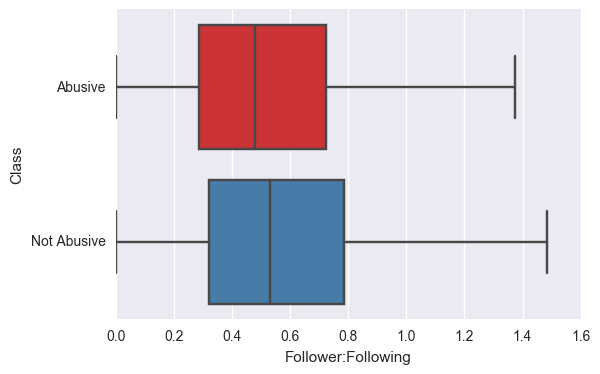

In [102]:
lx=sns.boxplot('loggedF:F','Class',data=df_Totalnew, showfliers=False, palette="Set1")
lx.set(xlabel='Follower:Following', ylabel='Class')
lx.figure.savefig('New Follower:Following Box Plots Final.png')

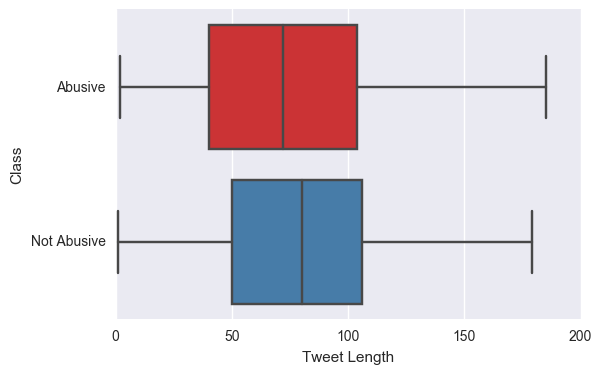

In [101]:
ax=sns.boxplot('tweetLen','Class',data=df_Totalnew, showfliers=False, palette="Set1")
ax.set(xlabel='Tweet Length', ylabel='Class')
ax.figure.savefig('New Tweet Length Box Plots FINAL.png')

# MAps

In [90]:
dfUK=df_Totalnew[(df_Totalnew['country']=='United Kingdom')]



totalEachcity=dfUK['cityArea'].value_counts()
dfabusive=dfUK[(dfUK['Class']=='Abusive')]
dfnonabusive=dfUK[(dfUK['Class']=='Not Abusive')]

abusiveinEachCity=dfabusive['cityArea'].value_counts()
nonabusiveinEachCity=dfnonabusive['cityArea'].value_counts()

In [91]:
NewDF=totalEachcity.to_frame()
ADf=abusiveinEachCity.to_frame()
NADf=nonabusiveinEachCity.to_frame()

In [94]:
Total_DF=pd.concat([NewDF, ADf, NADf], axis=1)
Total_DF['Percentage']=Total_DF.ix[:,1]/Total_DF.ix[:,0]
Total_DF=Total_DF.dropna(how='any', axis=0)

In [98]:
Total_DF['City'] = Total_DF.index
Total_DF['Country']='United Kingdom'
Total_DF.to_excel('New Tablaue data Final.xls')

In [99]:
Total_DF

,cityArea,cityArea,cityArea,Percentage,City,Country
Aberdeen,164,39.0,125.0,0.237805,Aberdeen,United Kingdom
Ayr,186,50.0,136.0,0.268817,Ayr,United Kingdom
Belfast,253,91.0,162.0,0.359684,Belfast,United Kingdom
Birmingham,1524,430.0,1094.0,0.282152,Birmingham,United Kingdom
Blackpool,185,63.0,122.0,0.340541,Blackpool,United Kingdom
Bournemouth,164,47.0,117.0,0.286585,Bournemouth,United Kingdom
Brighton,740,144.0,596.0,0.194595,Brighton,United Kingdom
Bristol,867,189.0,678.0,0.217993,Bristol,United Kingdom
Cambridge,291,65.0,226.0,0.223368,Cambridge,United Kingdom
Cardiff,494,86.0,408.0,0.174089,Cardiff,United Kingdom
